In [1]:
library(tidyverse)
library(ggplot2)
library(patchwork)
source("helper.R")
library(pdftools)
library(scales)
library(xtable)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
sinfo_path = "../../output/sims_info.tsv"
sinfoh_path = "../../output/header_sims_info.tsv"

In [3]:
win_size = 5000000
chroms= c("chr12")
win_len = -1
padding = 0
rescf = 1
prop_acc=0.4

In [4]:
fig_prefixes = c("cor-pidxy-dT", "subset-chr12-landscapes","annot-correls-tmrca")
widths = c(100, 125, 100)
heights = c(25, 25, 35)
#fig_prefixes = c("annot-correls-tmrca")

In [5]:
sims_path = "../../output/sims_results/"
varmut_sims_path = "../../output/varmut/sims_results/"
pref = "cor-pidxy-pidxy"
data_path=paste0("../../output/greatapes-diversity-data/chr12/cor-pidxy-pidxy_win-size_",as.integer(win_size),"_merged-mask_True_state_all_curr_all_prop-acc_0.4.tsv")

In [6]:
# loading sims info table
sinfo = read.table(sinfo_path, sep="\t", fill=TRUE)
h = read.table(sinfoh_path, sep="\t", header=TRUE)
cnames = colnames(h)
if (length(sinfo) == length(h)+1) {
    cnames = c(cnames, "poscoefdecayeps")
}
colnames(sinfo) = cnames

In [7]:
#diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "rescf", "win_len", "padding", "chr")
diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "poscoefdecayeps", "rescf", "win_len", "padding", "chr")

In [8]:
wsize_str = paste0("win-size_",as.integer(win_size))

In [9]:
sims_folders = paste0(sims_path,list.files(sims_path)[grep(wsize_str, list.files(sims_path))])

In [10]:
varmut_sims_folders = paste0(varmut_sims_path,list.files(varmut_sims_path)[grep(wsize_str, list.files(varmut_sims_path))])

In [11]:
sims_folders = c(sims_folders, varmut_sims_folders)

In [12]:
sims_folders

[1] "../../output/sims_results/sup-rand-id_0ASPD1FD6L57DMLSWJ_rep_0_win-size_5000000_sample-size_10"
  [2] "../../output/sims_results/sup-rand-id_1TRVVV3G18G1VCU5Y2_rep_0_win-size_5000000_sample-size_10"
  [3] "../../output/sims_results/sup-rand-id_1ZTIP09L94JNZTP6P1_rep_0_win-size_5000000_sample-size_10"
  [4] "../../output/sims_results/sup-rand-id_3CE1SNB9BZTMK1K8IE_rep_0_win-size_5000000_sample-size_10"
  [5] "../../output/sims_results/sup-rand-id_3GIHR79KVHKB6B02WF_rep_0_win-size_5000000_sample-size_10"
  [6] "../../output/sims_results/sup-rand-id_42LT1TYU611QINUWDG_rep_0_win-size_5000000_sample-size_10"
  [7] "../../output/sims_results/sup-rand-id_4GROMS6FHMNW5X9L72_rep_0_win-size_5000000_sample-size_10"
  [8] "../../output/sims_results/sup-rand-id_4NADO6705U5SN8I1V2_rep_0_win-size_5000000_sample-size_10"
  [9] "../../output/sims_results/sup-rand-id_520Y4OL8HJQN1FDSN9_rep_0_win-size_5000000_sample-size_10"
 [10] "../../output/sims_results/sup-rand-id_55RSB70EO1HGU1ZYFX_rep_0_win-size_5000000_sample-size_10"
 [11] "../../output/sims_results/sup-rand-id_562V5VDT6Y66UT3SKV_rep_0_win-size_5000000_sample-size_10"
 [12] "../../output/sims_results/sup-rand-id_57Y8L1U6MJBD98COMV_rep_0_win-size_5000000_sample-size_10"
 [13] "../../output/sims_results/sup-rand-id_5GTZF5LD803SRD6EQ9_rep_0_win-size_5000000_sample-size_10"
 [14] "../../output/sims_results/sup-rand-id_5IYZ1NWXLW8R8TR43Z_rep_0_win-size_5000000_sample-size_10"
 [15] "../../output/sims_results/sup-rand-id_5QXE1D7WE2XZIALIV8_rep_0_win-size_5000000_sample-size_10"
 [16] "../../output/sims_results/sup-rand-id_60X8ZD9TMU5E62ZOZA_rep_0_win-size_5000000_sample-size_10"
 [17] "../../output/sims_results/sup-rand-id_6HXVYZIAGCUED38QIL_rep_0_win-size_5000000_sample-size_10"
 [18] "../../output/sims_results/sup-rand-id_6MB8N72SPZ3RD6A5NC_rep_0_win-size_5000000_sample-size_10"
 [19] "../../output/sims_results/sup-rand-id_7AXZWZ58S0N6AEPW66_rep_0_win-size_5000000_sample-size_10"
 [20] "../../output/sims_results/sup-rand-id_7RAE4BNCELKNBN2LQ8_rep_0_win-size_5000000_sample-size_10"
 [21] "../../output/sims_results/sup-rand-id_7SSS4J5A8UC8LYVWBM_rep_0_win-size_5000000_sample-size_10"
 [22] "../../output/sims_results/sup-rand-id_8MF0I020MWGI6N41PH_rep_0_win-size_5000000_sample-size_10"
 [23] "../../output/sims_results/sup-rand-id_8NYARZTMLXU8JGXY6O_rep_0_win-size_5000000_sample-size_10"
 [24] "../../output/sims_results/sup-rand-id_8VJOM0D3I01B2NRYJT_rep_0_win-size_5000000_sample-size_10"
 [25] "../../output/sims_results/sup-rand-id_93GIWTX2GJNEC8V18B_rep_0_win-size_5000000_sample-size_10"
 [26] "../../output/sims_results/sup-rand-id_9H89YU146KRYEE6CEL_rep_0_win-size_5000000_sample-size_10"
 [27] "../../output/sims_results/sup-rand-id_9K3JUI0WI4MAE1TJMJ_rep_0_win-size_5000000_sample-size_10"
 [28] "../../output/sims_results/sup-rand-id_AA9GUSRHWOA341WGC4_rep_0_win-size_5000000_sample-size_10"
 [29] "../../output/sims_results/sup-rand-id_AANUYLVL6P7UCA3ZUN_rep_0_win-size_5000000_sample-size_10"
 [30] "../../output/sims_results/sup-rand-id_AYSFUH4DX4QOAONVTF_rep_0_win-size_5000000_sample-size_10"
 [31] "../../output/sims_results/sup-rand-id_BUIGSIOWMVJDIROAC9_rep_0_win-size_5000000_sample-size_10"
 [32] "../../output/sims_results/sup-rand-id_BUTK12OV6V4874PY5V_rep_0_win-size_5000000_sample-size_10"
 [33] "../../output/sims_results/sup-rand-id_BY9SIVUCEEPI7M39QA_rep_0_win-size_5000000_sample-size_10"
 [34] "../../output/sims_results/sup-rand-id_C03VGI7EGKVKGNBWA4_rep_0_win-size_5000000_sample-size_10"
 [35] "../../output/sims_results/sup-rand-id_CR1UIIF8NRSPZ94LGF_rep_0_win-size_5000000_sample-size_10"
 [36] "../../output/sims_results/sup-rand-id_CWC6ZI8343UDIZST9L_rep_0_win-size_5000000_sample-size_10"
 [37] "../../output/sims_results/sup-rand-id_D0YL64M5K1JYAORI5Z_rep_0_win-size_5000000_sample-size_10"
 [38] "../../output/sims_results/sup-rand-id_DDY00BXD0CE06VCO0N_rep_0_win-size_5000000_sample-size_10"
 [39] "../../output/sims_results/sup-rand-id_DFFB9J9GYC00WIFTAQ_rep_0_win-size_5000000_s

In [13]:
simresults = as.data.frame(do.call(rbind, lapply(X = sims_folders, function(x) unlist(meta_from_fname(x,prop=prop_acc,suffix="$")))), stringsAsFactors =FALSE)

In [14]:
simresults$folderpath = sims_folders

In [15]:
tmp = unique(sinfo[sinfo$sup_rand_id %in% simresults$sup_rand_id,c(diff_cols,"sup_rand_id")])

In [16]:
simresults = left_join(simresults, tmp)
simresults$posrate[is.na(simresults$posrate)] = 0

Joining, by = "sup_rand_id"



In [17]:
simresults = simresults[simresults$win_len==win_len &
                        simresults$padding == padding &
                        simresults$rescf==1 &
                        as.numeric(simresults$win_size) == win_size &
                        simresults$chr %in% chroms &
                        simresults$posrate <= 1.8e-11,]

In [18]:
simresults[is.na(simresults$poscoefdecayeps),]$poscoefdecayeps = 0

In [19]:
simresults$selregime = ifelse(simresults$posrate<1e-16,ifelse(simresults$delrate<1e-16, ifelse(simresults$sigma==0, "neutral", "varmut"), "del_only"), ifelse(simresults$delrate<1e-16, "pos_only", "both"))

In [20]:
colnames(simresults)

[1] "win_size"        "sup_rand_id"     "rep"             "sample_size"    
 [5] "spaced_desc"     "desc"            "prop"            "is_ga_data"     
 [9] "sigma"           "state"           "folderpath"      "delrate"        
[13] "delcoef"         "posrate"         "poscoef"         "mu"             
[17] "poscoefdecayeps" "rescf"           "win_len"         "padding"        
[21] "chr"             "selregime"

In [21]:
blah = unique(simresults[,c("delrate", "posrate", "delcoef","poscoef","selregime","sigma")])

In [22]:
blah$sigma

[1] "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0"
[20] "0" "0" "0" "0" "0" "0" "0"

In [23]:
blah = blah[order(blah$delrate, blah$delcoef, blah$posrate, blah$poscoef, blah$sigma),]
blah

,delrate,posrate,delcoef,poscoef,selregime,sigma
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
22,0.0e+00,0e+00,0.000,0.000,neutral,0
91,0.0e+00,1e-12,0.000,0.010,pos_only,0
7,0.0e+00,1e-11,0.000,0.010,pos_only,0
88,2.0e-09,0e+00,-0.030,0.000,del_only,0
47,2.0e-09,1e-11,-0.030,0.010,both,0
89,2.0e-09,0e+00,-0.015,0.000,del_only,0
85,2.0e-09,1e-11,-0.015,0.010,both,0
108,2.0e-09,0e+00,-0.010,0.000,del_only,0
19,2.0e-09,1e-12,-0.010,0.005,both,0


In [24]:
tab<-xtable(blah, 
            caption= "Simulation parameters", digits=-3, auto=TRUE)

In [25]:
print(tab, include.rownames=F, display=c('f','f','f','f','f','s','f'), math.style.exponents = T)

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Mon Sep 18 14:23:39 2023
\begin{table}[ht]
\centering
\begin{tabular}{rrrrll}
  \hline
delrate & posrate & delcoef & poscoef & selregime & sigma \\ 
  \hline
$0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & neutral & 0 \\ 
  $0.000 \times 10^{0}$ & $1.000 \times 10^{-12}$ & $0.000 \times 10^{0}$ & $1.000 \times 10^{-2}$ & pos\_only & 0 \\ 
  $0.000 \times 10^{0}$ & $1.000 \times 10^{-11}$ & $0.000 \times 10^{0}$ & $1.000 \times 10^{-2}$ & pos\_only & 0 \\ 
  $2.000 \times 10^{-9}$ & $0.000 \times 10^{0}$ & $-3.000 \times 10^{-2}$ & $0.000 \times 10^{0}$ & del\_only & 0 \\ 
  $2.000 \times 10^{-9}$ & $1.000 \times 10^{-11}$ & $-3.000 \times 10^{-2}$ & $1.000 \times 10^{-2}$ & both & 0 \\ 
  $2.000 \times 10^{-9}$ & $0.000 \times 10^{0}$ & $-1.500 \times 10^{-2}$ & $0.000 \times 10^{0}$ & del\_only & 0 \\ 
  $2.000 \times 10^{-9}$ & $1.000 \times 10^{-11}$ & $-1.500 \times 10^{-2}$

In [26]:
simresults$seldesc = apply(
    simresults,
    1,
    function(x) paste("mu-D=", x["delrate"],
                      " mu-B=", x["posrate"],
                      ifelse(x["sigma"]>0, paste0("\nmut-sd=", x['sigma']),""),
                      ifelse(x['selregime'] %in% c("del_only", "both"), paste0("\ncoef-D=", x["delcoef"]), ""),
                      ifelse(x['selregime'] %in% c("both", "pos_only"), paste0("\ncoef-B=", x["poscoef"], " decay-B=", format(as.numeric(x["poscoefdecayeps"]),nsmall=3)), ""),
                      "\n(", x["sup_rand_id"], ")", 
                      sep=""))
simresults$seldesc_norandid = apply(
    simresults,
    1,
    function(x) paste("mu-D=", x["delrate"],
                      " mu-B=", x["posrate"],
                      ifelse(x["sigma"]>0, paste0("\nmut-sd=", x['sigma']),""), 
                      ifelse(x['selregime'] %in% c("del_only", "both"), paste0("\ncoef-D=", x["delcoef"]), ""),
                      ifelse(x['selregime'] %in% c("both", "pos_only"), paste0("\ncoef-B=", x["poscoef"], " decay-B=", format(as.numeric(x["poscoefdecayeps"]),nsmall=3)), ""),
                      sep=""))

In [27]:
format('0',nsmall=3)

[1] "0"

In [28]:
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "\n", " ")
simresults$seldesc_norandid = str_replace(simresults$seldesc_norandid, " \\(.+$", "")
simresults$seldesc_norandid = str_replace(simresults$seldesc_norandid, " coef-.+$", "")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "mu-D=0.0e\\+00", "")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "mu-B=0e\\+00", "")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "data", "Data")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "mu", "\\u03bc")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "-D", "\\u2099")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "-B", "\\u209a")
simresults$seldesc_norandid = str_replace(simresults$seldesc_norandid, "\\u03bct", "\\u03bc")

In [29]:
simresults$sigma = as.numeric(simresults$sigma)

In [30]:
tmp = simresults
ordered = c("neutral", "del_only", "pos_only", "both", "varmut")
classes = unique(tmp$selregime)
tmp$selregime = factor(tmp$selregime, levels=classes[order(match(classes,ordered))])
tmp = tmp[
  with(tmp, order(selregime,posrate,-poscoefdecayeps,delrate,poscoef,delcoef,sigma)),
]
simresults=tmp

In [31]:
simresults$poscoefdecayeps

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [32]:
simresults[simresults$sup_rand_id == "4GROMS6FHMNW5X9L72",]

,win_size,sup_rand_id,rep,sample_size,spaced_desc,desc,prop,is_ga_data,sigma,state,⋯,poscoef,mu,poscoefdecayeps,rescf,win_len,padding,chr,selregime,seldesc,seldesc_norandid
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<chr>,<chr>
7,5000000,4GROMS6FHMNW5X9L72,0,10,sup-rand-id=4GROMS6FHMNW5X9L72 rep=0 win-size=5000000 sample-size=10 prop-acc=0.4,sup-rand-id_4GROMS6FHMNW5X9L72_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,0.4,FALSE,0,all,⋯,0.01,1e-11,0,1,-1,0,chr12,pos_only,mu-D=0.0e+00 mu-B=1e-11 coef-B=0.010 decay-B=0.000 (4GROMS6FHMNW5X9L72),μₚ=1e-11


In [33]:
data_row = simresults[1,]
data_row$sup_rand_id="data"
data_row$spaced_desc="data"
data_row$desc="data"
data_row$is_ga_data=TRUE
data_row$sigma=0
data_row$state="all"
data_row$folderpath = data_path
data_row$delrate=0
data_row$delcoef=0
data_row$posrate=0
data_row$poscoef=0
data_row$mu=0
data_row$poscoefdecayeps=0.000
data_row$rescf=0
data_row$win_len=0
data_row$padding=0
data_row$selregime="data"
data_row$seldesc="data"
data_row$chr = "chr12"

In [34]:

a = apply(simresults,1, function(x) read.table(paste0(x["folderpath"],
                                             "/",pref, "_",x["desc"],".tsv"), sep="\t", header=TRUE))

In [35]:
data_df = read.table(data_row$folderpath,sep="\t",header=TRUE)
#data_df = data_df[data_df$chr %in% chroms,] # getting only chroms of interest

In [36]:

simresults = rbind(simresults,data_row)

In [37]:
a = append(a,list(data_df))

In [38]:
length(a)

[1] 27

In [39]:
names(a) = simresults$desc

In [40]:
a = bind_rows(a, .id="id")

In [41]:
a = left_join(a, simresults, by=c("id"="desc"))

In [42]:
a[,c("spp1_1", "spp2_1")] = t(apply(a[,c("spp1_1", "spp2_1")], 1, sort))
a[,c("spp1_2", "spp2_2")] = t(apply(a[,c("spp1_2", "spp2_2")], 1, sort))

a$spp1 = paste(a$spp1_1, a$spp2_1, sep="_")
a$spp2 = paste(a$spp1_2, a$spp2_2, sep="_")
a[,c("spp1", "spp2")] = t(apply(a[,c("spp1", "spp2")], 1, sort))
a$poscoefdecayeps = format(a$poscoefdecayeps,nsmall=3)

Warning message:
“Removed 1648 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_smooth).”


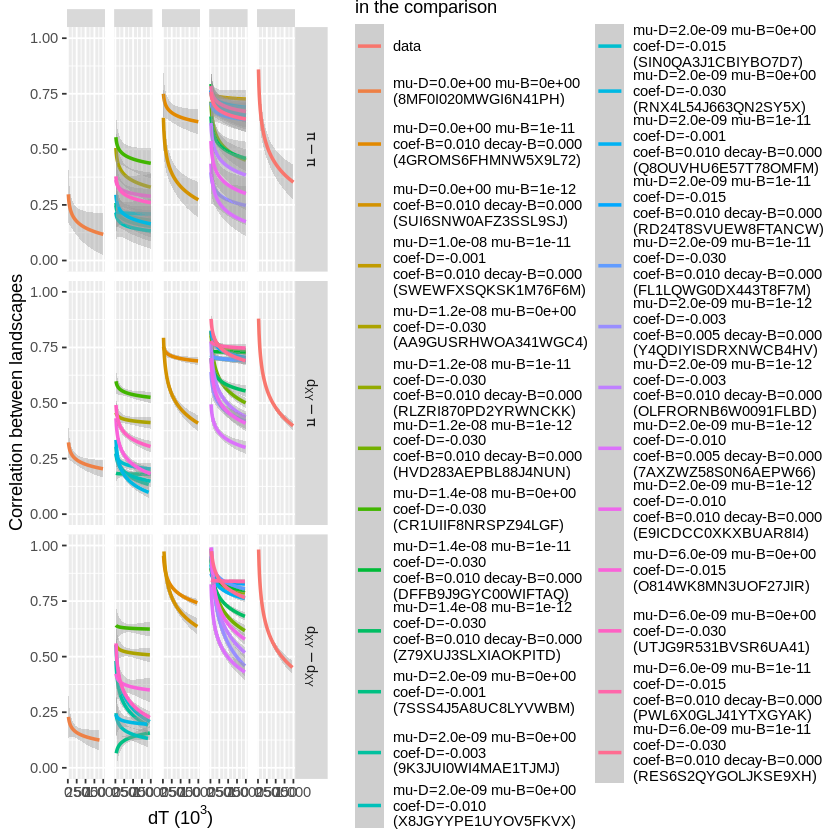

In [43]:
statcombolabs = c(`dxy_dxy`="d[XY]-d[XY]", `dxy_pi`="d[XY]-pi", `pi_pi`="pi-pi")
lownelabs = c(`TRUE`="Yes", `False`="No")
p_dt = ggplot(a[a$has_shared == FALSE,], aes(y=value, x=dt, col=seldesc)) +
    geom_smooth(formula = y ~ I(log(x)), method="lm") +
    scale_shape_manual(values=c(19, 18), labels=c("No", "Yes")) +
    scale_x_continuous(labels = label_number(scale = 1e-3)) +
    #scale_color_viridis_d(direction=-1, end=0.7) +
    facet_grid(factor(statcombo, levels=c("pi_pi", "dxy_pi", "dxy_dxy"))~selregime, scales="free", labeller=as_labeller(statcombolabs, default=label_parsed)) +
    labs(x=bquote("dT ("*10^3*")"), y="Correlation between landscapes", shape=bquote(pi*" in low "*N[e]*" species?"), col="Number of species involved\nin the comparison") +
    ylim(0,1) +
    guides(colour = guide_legend(title.position="top"), shape = guide_legend(title.position="top"))

p_dt

In [44]:
wide_a = a[,c("id","spp1", "spp2", "selregime", "seldesc", "seldesc_norandid", "value")] %>%
    pivot_wider(id_cols=c("id","selregime","seldesc", "seldesc_norandid"),
                names_from=c("spp1", "spp2"),
                values_from=c("value"),
                names_sep="__") %>%
    ungroup()

In [45]:
corrs_pca <- prcomp(select(wide_a,-c("id","selregime","seldesc", "seldesc_norandid")), center = TRUE,scale. = TRUE)


In [46]:
components <- corrs_pca[["x"]]
components <- data.frame(components)
components <- cbind(components, wide_a$selregime)
components <- cbind(components, wide_a$seldesc)
props = round(summary(corrs_pca)[[6]][2,]*100,2)

In [47]:
library(ggfortify)

In [48]:
wide_a$selregime = factor(wide_a$selregime, levels=c("data", "neutral", "del_only", "pos_only", "both", "varmut"), labels=c("Empirical data", "Neutral", "Deleterious", "Positive", "Both", "Neutral"))


In [49]:
pcadf <- data.frame(selregime = wide_a$selregime,
                                       PC1 = corrs_pca$x[,1],
                                       PC2 = corrs_pca$x[,2])

In [50]:
selected_points = c("mu-D=0.0e+00 mu-B=0e+00\n(8MF0I020MWGI6N41PH)",
                    "data",
                    "mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)", 
                    "mu-D=1.4e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(Z79XUJ3SLXIAOKPITD)", 
                    "mu-D=0.0e+00 mu-B=1e-11\ncoef-B=0.010 decay-B=0.000\n(4GROMS6FHMNW5X9L72)", 
                    "mu-D=0.0e+00 mu-B=1e-12\ncoef-B=0.010 decay-B=0.000\n(SUI6SNW0AFZ3SSL9SJ)", 
                    "mu-D=0.0e+00 mu-B=0e+00\nmut-sd=0.070\n(8MF0I020MWGI6N41PH)")

In [51]:
pcadf$seldesc_norandid = wide_a$seldesc_norandid
pcadf$seldesc = wide_a$seldesc
pcadf$mrv = grepl("sd", pcadf$seldesc)

In [52]:
pcadf

selregime,PC1,PC2,seldesc_norandid,seldesc,mrv
<fct>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
Neutral,-63.9566936,-23.3228642,,mu-D=0.0e+00 mu-B=0e+00 (8MF0I020MWGI6N41PH),FALSE
Deleterious,-50.8077684,1.4372205,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.030 (RNX4L54J663QN2SY5X),FALSE
Deleterious,-54.8971411,-13.0675162,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.015 (SIN0QA3J1CBIYBO7D7),FALSE
Deleterious,-67.1205498,-0.2014246,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.010 (X8JGYYPE1UYOV5FKVX),FALSE
Deleterious,-46.3217823,9.6329108,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.003 (9K3JUI0WI4MAE1TJMJ),FALSE
Deleterious,-52.6380247,5.6313242,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.001 (7SSS4J5A8UC8LYVWBM),FALSE
Deleterious,-21.3907986,8.6344985,μₙ=6.0e-09,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.030 (UTJG9R531BVSR6UA41),FALSE
Deleterious,-22.9652031,8.5666864,μₙ=6.0e-09,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.015 (O814WK8MN3UOF27JIR),FALSE
Deleterious,-3.8263981,5.3127361,μₙ=1.2e-08,mu-D=1.2e-08 mu-B=0e+00 coef-D=-0.030 (AA9GUSRHWOA341WGC4),FALSE


In [53]:
pcadf$mrv = factor(pcadf$mrv, levels=c("FALSE", "TRUE"), labels=c("Constant","Local variation"))

In [54]:
pcadf[!pcadf$seldesc %in% selected_points,]$seldesc_norandid = ""


In [55]:
pcadf[pcadf$seldesc_norandid == " ",]$seldesc_norandid = as.character(pcadf[pcadf$seldesc_norandid == " ",]$selregime)

In [56]:
selected_points == 'mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0\n(HVD283AEPBL88J4NUN)'

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [57]:
library(ggrepel)

In [58]:
cols6 = c("#b3943f",
"#9565c8",
"#62a85b",
"#c85b8e",
"#6295cd",
"#cc5c42")
pcap = ggplot(pcadf, aes(x=PC1,y=PC2, col=selregime, shape=mrv, label=seldesc_norandid)) + 
    geom_point(size=2) + 
    scale_colour_manual(values=cols6) + 
    labs(col="Regime", x=paste0("PC1 ","(",props["PC1"],"%)"), y=paste0("PC2 ","(",props["PC2"],"%)"),shape="Mutation rate") + 
    theme_bw(base_size=18) + 
    geom_text_repel(min.segment.length = 0, show.legend = FALSE)# +
    #theme(legend.position="top")

ggsave(paste0("../../output/final_figs/pca_",win_size,".pdf"), width=8, height=6, device=cairo_pdf)

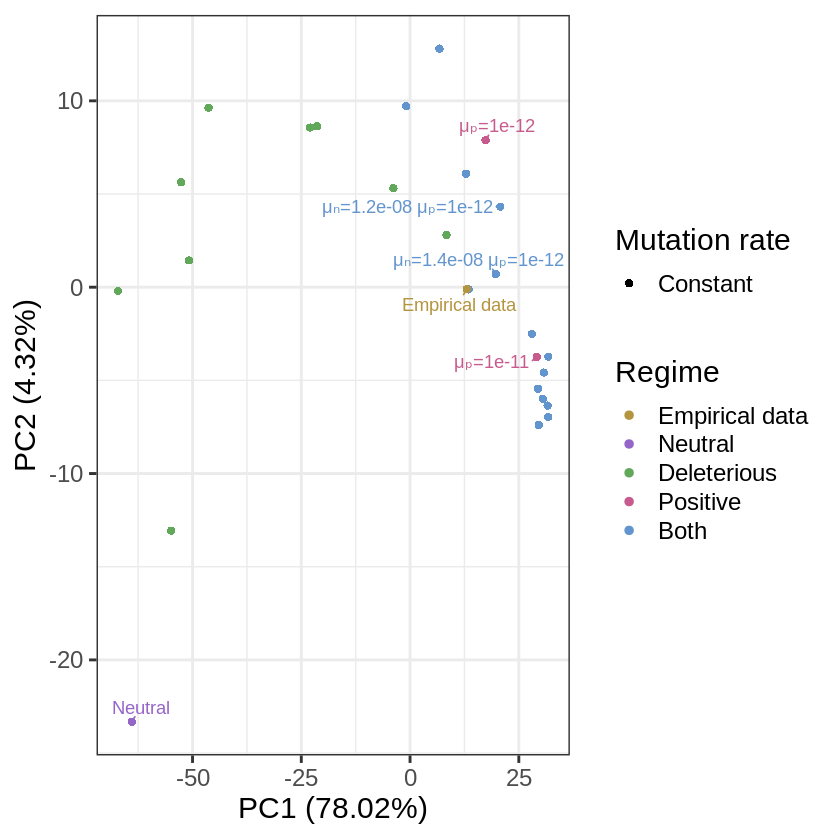

In [59]:
pcap

In [60]:
wide_a

id,selregime,seldesc,seldesc_norandid,bornean-orangutan_bornean-orangutan__bornean-orangutan_sumatran-orangutan,bornean-orangutan_bornean-orangutan__sumatran-orangutan_sumatran-orangutan,bornean-orangutan_bornean-orangutan__bornean-orangutan_eastern-gorilla,bornean-orangutan_bornean-orangutan__eastern-gorilla_sumatran-orangutan,bornean-orangutan_bornean-orangutan__eastern-gorilla_eastern-gorilla,bornean-orangutan_bornean-orangutan__bornean-orangutan_western-gorilla,⋯,bonobo_central-chimp__central-chimp_nigerian-chimp,bonobo_central-chimp__central-chimp_western-chimp,bonobo_central-chimp__central-chimp_eastern-chimp,bonobo_central-chimp__central-chimp_central-chimp,central-chimp_nigerian-chimp__central-chimp_western-chimp,central-chimp_eastern-chimp__central-chimp_nigerian-chimp,central-chimp_central-chimp__central-chimp_nigerian-chimp,central-chimp_eastern-chimp__central-chimp_western-chimp,central-chimp_central-chimp__central-chimp_western-chimp,central-chimp_central-chimp__central-chimp_eastern-chimp
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sup-rand-id_8MF0I020MWGI6N41PH_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Neutral,mu-D=0.0e+00 mu-B=0e+00 (8MF0I020MWGI6N41PH),,0.2655678,0.24236874,0.06105006,0.04945055,0.01221001,0.04395604,⋯,0.150793651,0.35531136,0.00976801,-0.02808303,0.8785104,0.6862027,0.6459096,0.7228327,0.6550672,0.8907204
sup-rand-id_RNX4L54J663QN2SY5X_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.030 (RNX4L54J663QN2SY5X),μₙ=2.0e-09,0.2539683,0.22344322,0.33760684,0.36324786,0.14285714,0.42063492,⋯,0.235653236,0.46153846,0.13858364,0.23382173,0.7087912,0.6514042,0.7026862,0.5000000,0.4877900,0.8003663
sup-rand-id_SIN0QA3J1CBIYBO7D7_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.015 (SIN0QA3J1CBIYBO7D7),μₙ=2.0e-09,0.1520147,-0.03479853,0.08241758,0.18009768,0.23931624,0.05006105,⋯,0.494505495,0.41636142,0.35836386,0.48656899,0.9120879,0.5860806,0.5665446,0.7045177,0.6684982,0.8577534
sup-rand-id_X8JGYYPE1UYOV5FKVX_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.010 (X8JGYYPE1UYOV5FKVX),μₙ=2.0e-09,-0.1208791,0.02869353,0.26007326,0.25885226,-0.09768010,0.23015873,⋯,0.193528694,0.29731380,0.37118437,0.29181929,0.9114774,0.4682540,0.3516484,0.4133089,0.3467643,0.8601954
sup-rand-id_9K3JUI0WI4MAE1TJMJ_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.003 (9K3JUI0WI4MAE1TJMJ),μₙ=2.0e-09,-0.2173382,-0.11965812,-0.14774115,-0.17704518,0.28754579,-0.13125763,⋯,0.302808303,0.42063492,0.42368742,0.37606838,0.7490842,0.5848596,0.6471306,0.5470085,0.5750916,0.9523810
sup-rand-id_7SSS4J5A8UC8LYVWBM_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.001 (7SSS4J5A8UC8LYVWBM),μₙ=2.0e-09,0.1239316,0.19230769,0.10866911,0.09584860,-0.10927961,0.13308913,⋯,-0.004273504,0.05616606,0.14102564,0.04273504,0.8968254,0.4065934,0.3852259,0.4603175,0.4383394,0.8589744
sup-rand-id_UTJG9R531BVSR6UA41_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.030 (UTJG9R531BVSR6UA41),μₙ=6.0e-09,0.4725275,0.27533578,0.41269841,0.44200244,0.37423687,0.40720391,⋯,0.728937729,0.71306471,0.74114774,0.69291819,0.9145299,0.7796093,0.7765568,0.7808303,0.7838828,0.9090354
sup-rand-id_O814WK8MN3UOF27JIR_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.015 (O814WK8MN3UOF27JIR),μₙ=6.0e-09,0.1709402,0.34859585,0.38461538,0.38766789,0.07692308,0.40170940,⋯,0.496947497,0.49511600,0.56105006,0.60256410,0.8925519,0.8150183,0.7973138,0.8473748,0.8162393,0.8937729
sup-rand-id_AA9GUSRHWOA341WGC4_rep_0_win-size_5000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=1.2e-08 mu-B=0e+00 coef-D=-0.030 (AA9GUSRHWOA341WGC4),μₙ=1.2e-08,0.5677656,0.42246642,0.21